# <center><font color=darkcyan> SAN FRANCISCO AIRPORT CLUSTERING PROJECT</center>

<img src="https://twistedsifter.com/wp-content/uploads/2013/09/san-francisco-airport-sfo-from-above-aerial.jpg" width="800">

In this project, we aim to generate meaningful clusters using flight data from San Francisco International Airport and analyze these clusters based on various characteristics. The KMeans clustering algorithm will be applied to the flight dataset to group airlines according to their similarities in terms of flight types, passenger volumes, and other relevant features.

### DATA DICTIONARIES:

**Activity Period:** Indicates the time period during which the flights took place.

**Operating Airline:** Specifies the name of the airline operating the flight.

**Operating Airline IATA Code:** Contains the IATA code of the airline operating the flight.

**Published Airline:** Refers to the airline under which the flight is published and generally represents the airline responsible for marketing the flight.

**Published Airline IATA Code:** Contains the IATA code of the published airline.

**GEO Summary:** A categorical variable summarizing the origin and destination locations of the flight.

**GEO Region:** Indicates the geographical region associated with the flights. Examples include Asia, Europe, and North America.

**Activity Type Code:** Specifies the type of flight (e.g., International, Domestic).

**Price Category Code:** A categorical variable providing information about the price level associated with the flight.

**Terminal:** Indicates the airport terminal from which the flight departs.

**Boarding Area:** Shows the specific boarding area from which the flight is conducted.

**Passenger Count:** Represents the total number of passengers for each flight.


### PACKAGE IMPORTING

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is D87D-23AE

 Directory of C:\Users\HP\Documents\Yapay Zeka Kursu\Homework\8- San Francisco Airport Clustering

15.03.2025  01:44    <DIR>          .
14.03.2025  23:48    <DIR>          ..
15.03.2025  00:09    <DIR>          .ipynb_checkpoints
14.03.2025  23:49         1.972.617 air-traffic-passenger-statistics.csv
15.03.2025  01:44           345.776 San Francisco Airport Clustering Project.ipynb
               2 File(s)      2.318.393 bytes
               3 Dir(s)  300.270.080.000 bytes free


In [3]:
df=pd.read_csv("air-traffic-passenger-statistics.csv") # Data Importing

## <font color=darkorchid>EDA - Explatory Data Analysis

In [39]:
df.head() # The first 5 rows

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.info() # variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [6]:
df.shape # data size

(18885, 12)

In [7]:
df.duplicated().sum() # Is there any repeated row?

0

In [8]:
df.isnull().sum() # The number of the missing values

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [9]:
df.isnull().mean() * 100 # What percentage of the variables are missing?


Activity Period                0.000000
Operating Airline              0.000000
Operating Airline IATA Code    0.333598
Published Airline              0.000000
Published Airline IATA Code    0.333598
GEO Summary                    0.000000
GEO Region                     0.000000
Activity Type Code             0.000000
Price Category Code            0.000000
Terminal                       0.000000
Boarding Area                  0.000000
Passenger Count                0.000000
dtype: float64

**I'm not going to use variables containing empty data, so I'm not performing any operations on these empty variables.**

In [10]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [11]:
df["Operating Airline"].value_counts()

Operating Airline
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 89, dtype: int64

In [12]:
df["Operating Airline"].value_counts().shape # there are 89 categories in the Operating Airline

(89,)

In [13]:
df["GEO Summary"].value_counts() # Categories in the "GEO Summary"

GEO Summary
International    11904
Domestic          6981
Name: count, dtype: int64

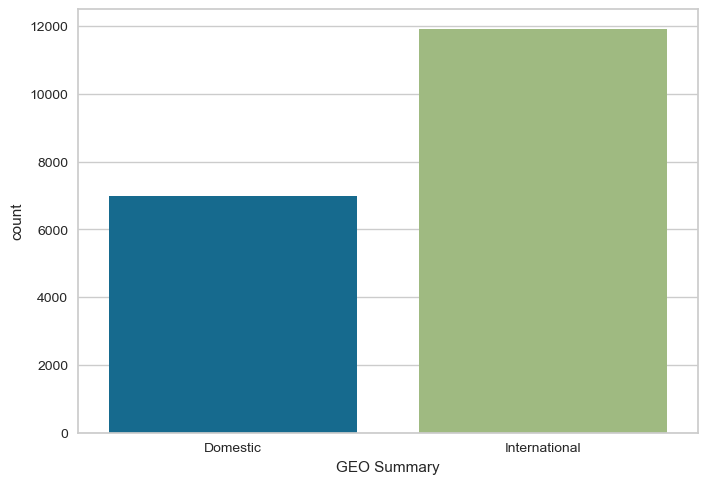

In [47]:
sns.countplot(x=df["GEO Summary"], hue=df["GEO Summary"]); # The barchart for the category frequences

In [14]:
df["GEO Region"].value_counts() # How regions are there?

GEO Region
US                     6981
Asia                   4073
Europe                 2803
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         383
Middle East             354
South America            91
Name: count, dtype: int64

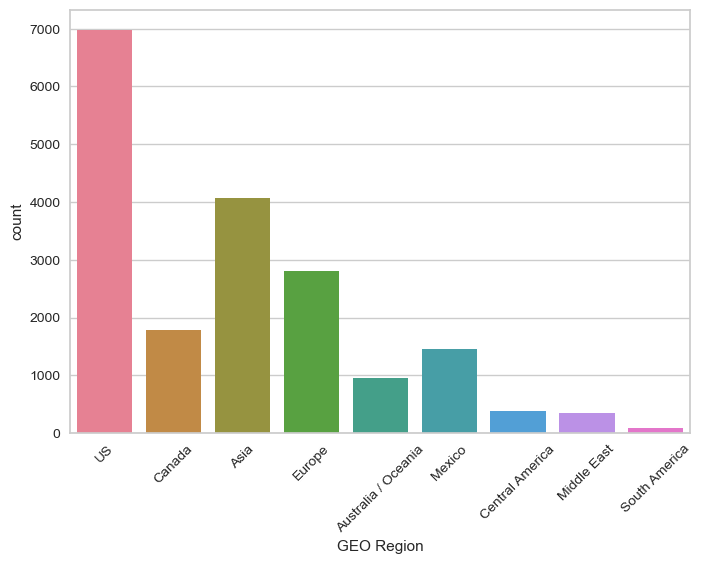

In [49]:
sns.countplot(x=df["GEO Region"], hue=df["GEO Region"])
plt.xticks(rotation=45)
plt.show();

In [15]:
df["Activity Type Code"].value_counts()  # Types of flight

Activity Type Code
Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: count, dtype: int64

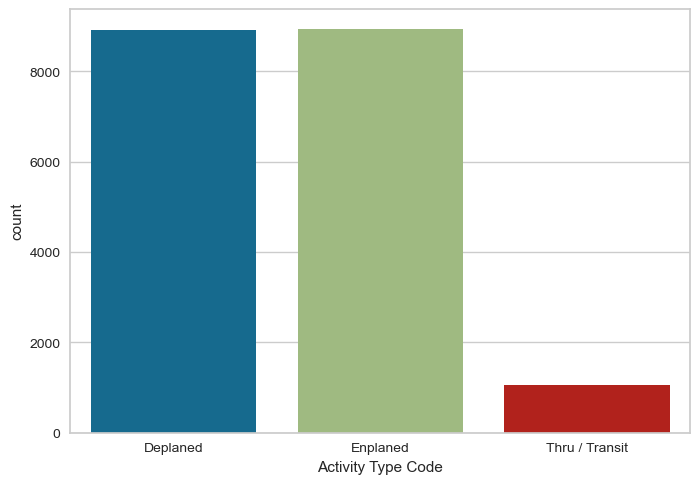

In [51]:
sns.countplot(x=df["Activity Type Code"], hue=df["Activity Type Code"]);

In [16]:
df["Price Category Code"].value_counts() 

Price Category Code
Other       16521
Low Fare     2364
Name: count, dtype: int64

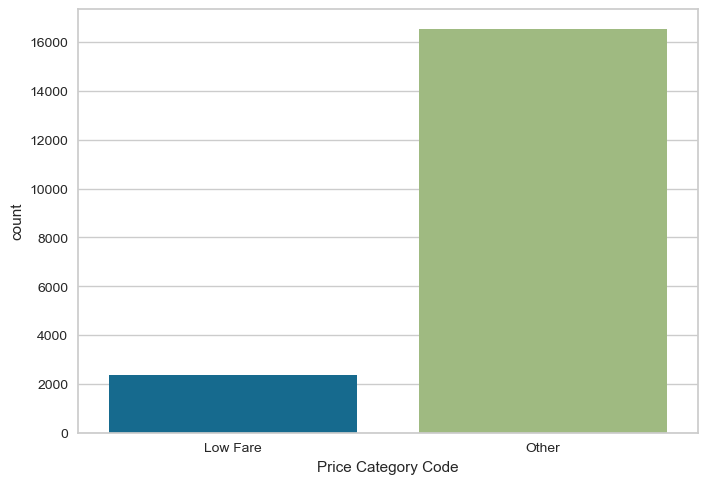

In [53]:
sns.countplot(x=df["Price Category Code"], hue=df["Price Category Code"]);

In [17]:
df["Terminal"].value_counts() 

Terminal
International    11963
Terminal 1        3610
Terminal 3        2699
Terminal 2         586
Other               27
Name: count, dtype: int64

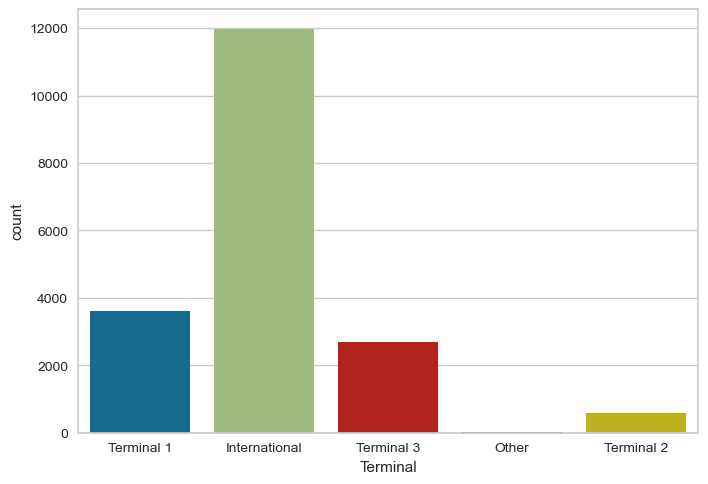

In [54]:
sns.countplot(x=df["Terminal"], hue=df["Terminal"]);

In [18]:
df["Boarding Area"].value_counts() 

Boarding Area
A        6679
G        5304
B        2128
F        1682
C        1462
E        1017
D         586
Other      27
Name: count, dtype: int64

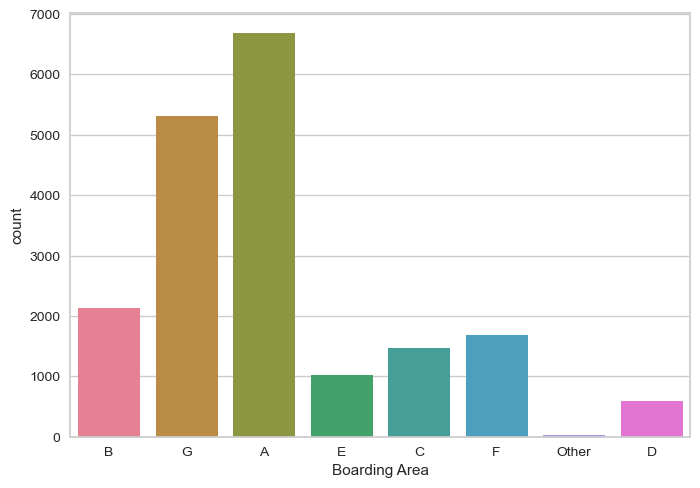

In [55]:
sns.countplot(x=df["Boarding Area"], hue=df["Boarding Area"]);

**I will cluster Operating Airline variables by using GEO Summary, GEO Region, Activity Type Code Price Category Code and Passenger Count variables.**

In [19]:
x= df[['GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Passenger Count']] # Features for clustering model

**In a clustering model, Only features are used and a target variable is not used.**

In [20]:
x=pd.get_dummies(x, drop_first=True) # Dummy transformation for categorical variables

## <font color=darkred>K-MEANS ALGORITHM

## <font color=darkorange>Define A Proper Amount Of Clusters By Using Elbow Method

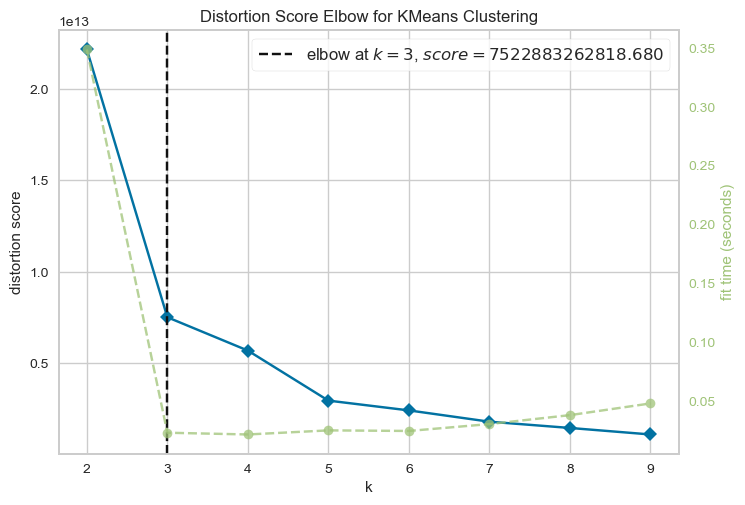

In [22]:
km = KMeans(random_state=42) # K- Means model (random samples by random state setting )
vis = KElbowVisualizer(km, k=(2,10))
vis.fit(x)
vis.show();

**The best amount of clusters is 3 according to the Elbow Method**

### <font color=#9ECE6A>CLUSTERING MODEL:

In [23]:
model=KMeans(n_clusters=3) # 3 clusters
model.fit(x) # model fitting 
tahmin=model.predict(x) # cluster predictions

In [24]:
tahmin

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
x["cluster"]=tahmin # add the cluster predictions

In [26]:
x.head() # the first 5 rows including the Class column

,Passenger Count,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Other,cluster
0,27271,False,False,False,False,False,False,False,False,True,False,False,False,0
1,29131,False,False,False,False,False,False,False,False,True,True,False,False,0
2,5415,False,False,False,False,False,False,False,False,True,False,True,False,0
3,35156,True,False,True,False,False,False,False,False,False,False,False,True,0
4,34090,True,False,True,False,False,False,False,False,False,True,False,True,0


In [27]:
x["cluster"].value_counts() # the number of observations in the classes 

cluster
0    16464
2     1996
1      425
Name: count, dtype: int64

***According to the clustering model predictions, the class which has the most observations is the Class 0***

In [28]:
silhouette_score(x,tahmin)

0.82835479761833

**The silhouette score above is not a model success metric. This score can be increased in order to increase the similarity.**

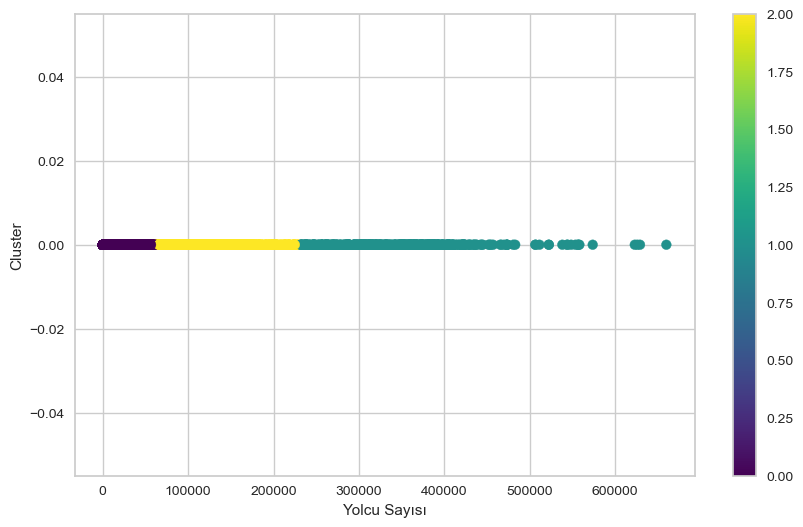

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x["Passenger Count"], [0]*len(x), c=tahmin, cmap='viridis')  # Y=0
plt.colorbar()
plt.xlabel('Yolcu Sayısı')
plt.ylabel('Cluster')
plt.show()

**The graph shows whether there is a clear separation between the clusters based on passenger count.**
